In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

db = pd.read_csv('./aluguel_uma_variavel_com_ruido.csv')

db.head()

,Area,Preco
0,132,3464.419025
1,136,3326.747554
2,101,2826.127544
3,218,5284.499573
4,50,2162.785902


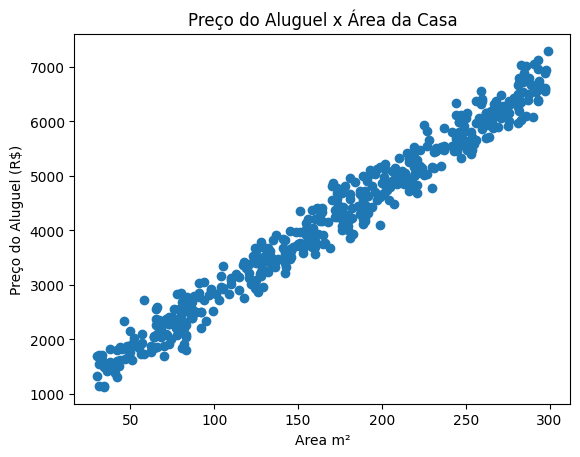

In [65]:
#Plotando o grafico da base 
plt.scatter(db["Area"], db["Preco"])
plt.xlabel("Area m²")
plt.ylabel("Preço do Aluguel (R$)")
plt.title('Preço do Aluguel x Área da Casa')
plt.show()

In [66]:
#Separando a base de treno e teste
db = db.sample(frac=1,random_state=42)
n = int(len(db) * 0.3)
teste = db.iloc[:n]
treino = db.iloc[n:]


In [67]:
#Criando um modelo
x_treino = treino[['Area']]
y_treino = treino[['Preco']]

modelo = LinearRegression()
#Treinando o modelo
modelo.fit(x_treino,y_treino)
coeficiente_angular =  int(modelo.coef_[0])
intercepto_linear = int(modelo.intercept_)
print(f"Modelo Linear Simples: y = {coeficiente_angular:.2f}x + {intercepto_linear:.2f}")



Modelo Linear Simples: y = 19.00x + 794.00


/tmp/ipykernel_49961/3358537253.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coeficiente_angular =  int(modelo.coef_[0])
/tmp/ipykernel_49961/3358537253.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercepto_linear = int(modelo.intercept_)


In [74]:
#Avaliando um modelo
x_teste = teste[['Area']]
y_teste = teste[['Preco']]
r2_treino = r2_score(y_teste, modelo.predict(x_teste))
print(f'R² treino: {r2_treino:.2f}')

R² treino: 0.97


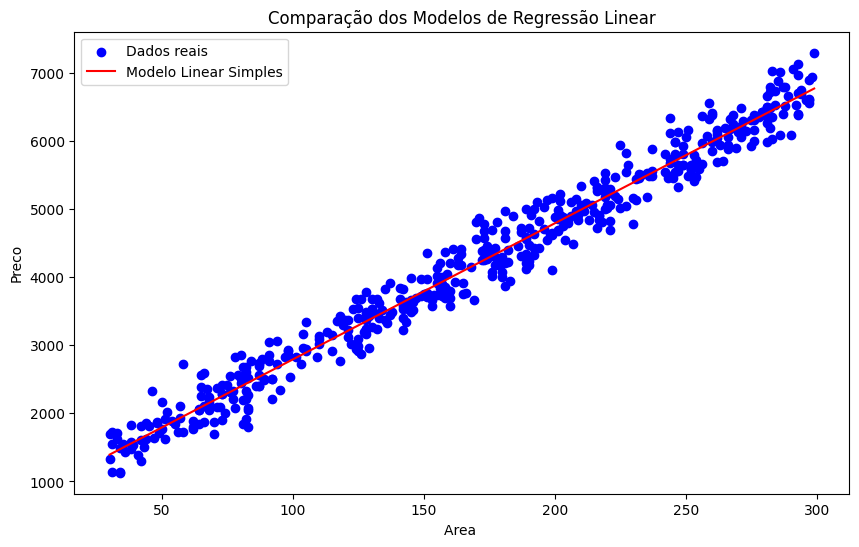

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(db['Area'], db['Preco'], color='blue', label='Dados reais')

area = np.linspace(db['Area'].min(), db['Area'].max(), 100)
area_df = pd.DataFrame({'Area': area})
plt.plot(area, modelo.predict(area_df), label='Modelo Linear Simples', color='red')
plt.xlabel('Area ')
plt.ylabel('Preco')
plt.title('Comparação dos Modelos de Regressão Linear')
plt.legend()
plt.show()
